# > Laberinto - Algoritmo de Q-Learning

Crea un programa en Python que usando el algoritmo Q-Learning, resuelva un 
laberinto, representado mediante la matriz MAZE de 10x10.

**RÚBRICA**:
- (4 Puntos) El algoritmo muestra soluciones aceptables.
- (2 Puntos) Se crean y comentan los métodos. 
- (2 Puntos) Uso del vocabulario correcto así como explicación de los hiperparámetos (factor de aprendizaje, factor de descuento etc).
- (2 Puntos) Usa ChatGPT para que te indique como crear la interfaz gráfica en JavaScript del juego del comococos para el  problema actual.

Se subirá un archivo PDF con el notebook de Jupiter incluyendo la ejecución y los markdown con las explicaciones.

In [16]:
# Importación de librerías

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

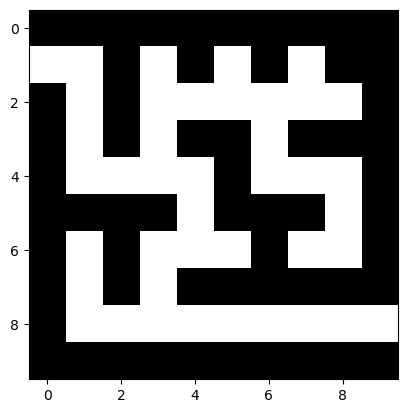

In [17]:
# Pasamos la imagen a una matriz

imageToMatrice  = imread('./images/laberinto10.png')
plt.imshow(imageToMatrice)

[[0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 1 0 1 0 0]
 [0 1 0 1 1 1 1 1 1 0]
 [0 1 0 1 0 0 1 0 0 0]
 [0 1 1 1 1 0 1 1 1 0]
 [0 0 0 0 1 0 0 0 1 0]
 [0 1 0 1 1 1 0 1 1 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0]]


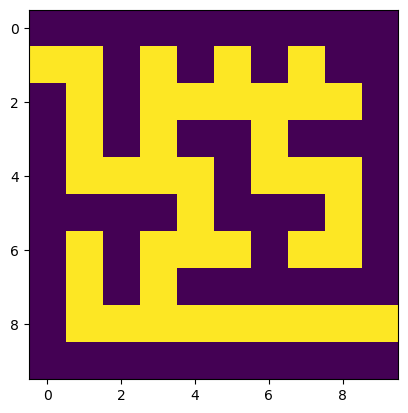

In [18]:
n = 10 # 10x10 píxeles - Tamaño de la Matriz

# Creamos la Matriz maze
maze = np.zeros((n,n),dtype=int)

# Copiamos la capa 0 en el maze
for i in range(0,n):
    for j in range(0,n):
        maze[i,j] = imageToMatrice[i,j,-1]
print(maze)
plt.imshow(maze)

In [19]:
# Creación de Matriz de marcado

mark = np.zeros((n,n),dtype=int)
mark[1,0] = 1 # Estado inicial

AHORA CREAMOS LA TABLA DE TRANSICIONES
1. CREAMOS UNA CLASE ESTADO QUE CONTENGA LAS COORDENADAS X E Y 
2. RECORREMOS LA IMAGEN CON DOS BUCLES FOR Y CREAMOS UN ESTADO PARA CADA PÍXEL AMARILLO
3. CREAMOS LA TABLA DE TRANSICIONES DEL NÚMERO DE ESTADOS x 4 (acciones) inicializada a -1
4. Probamos para cada estado qué acciones llevan a otro estado (píxel amarillo) y lo añadimos a la tabla
5. Creamos la tabla de recompensas inicializada a -1, salvo la desde los estados (puede ser solo uno) que conduzca a la salida, que valdrá 100
6. Entrenar el agente
7. Mostrar el camino correcto

In [20]:
# 1. CREAMOS UNA CLASE ESTADO QUE CONTENGA LAS COORDENADAS X E Y

class Estado:
    def __init__(self,x,y):
        self.x = x
        self.y = y
        
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def __str__(self):
        return f'[{self.x},{self.y}]'

    def __repr__(self) -> str:
        return f'[{self.x},{self.y}]'

    def __eq__(self, other):
        if isinstance(other, Estado):
            return self.x == other.x and self.y == other.y
        return False

In [21]:
# 2. RECORREMOS LA IMAGEN CON DOS BUCLES FOR Y CREAMOS UN ESTADO 
# PARA CADA PÍXEL AMARILLo

e = []
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j]:
            e.append(Estado(i,j))
print(e)

[[1,0], [1,1], [1,3], [1,5], [1,7], [2,1], [2,3], [2,4], [2,5], [2,6], [2,7], [2,8], [3,1], [3,3], [3,6], [4,1], [4,2], [4,3], [4,4], [4,6], [4,7], [4,8], [5,4], [5,8], [6,1], [6,3], [6,4], [6,5], [6,7], [6,8], [7,1], [7,3], [8,1], [8,2], [8,3], [8,4], [8,5], [8,6], [8,7], [8,8], [8,9]]


In [22]:
# 3. CREAMOS LA TABLA DE TRANSICIONES DEL NÚMERO DE 
# ESTADOS x 4 (acciones) inicializada a -1

T = np.full((len(e),4),-1)

In [23]:
# Matriz de movimiento

move = np.zeros((4,2),dtype=int)
# Derecha
move[0,0] = 0
move[0,1] = 1
# Izquierda
move[1,0] = 0
move[1,1] = -1
# Arriba
move[2,0] = 1
move[2,1] = 0
# Abajo
move[3,0] = -1
move[3,1] = 0

In [24]:
# 4. Probamos para cada estado qué acciones llevan 
# a otro estado (píxel amarillo) y lo añadimos a la tabla

contE = 0
for i in range(len(e)):
    for mov in range(0,4):
        newX = e[i].getX() + move[mov,0]
        newY = e[i].getY() + move[mov,1]
        if (newX < 10 and newY < 10) or (newX < 0 and newY < 0):
            if maze[newX,newY] == 1:
                T[i,mov] = e.index(Estado(newX,newY))
print(T)

[[ 1 -1 -1 -1]
 [-1  0  5 -1]
 [-1 -1  6 -1]
 [-1 -1  8 -1]
 [-1 -1 10 -1]
 [-1 -1 12  1]
 [ 7 -1 13  2]
 [ 8  6 -1 -1]
 [ 9  7 -1  3]
 [10  8 14 -1]
 [11  9 -1  4]
 [-1 10 -1 -1]
 [-1 -1 15  5]
 [-1 -1 17  6]
 [-1 -1 19  9]
 [16 -1 -1 12]
 [17 15 -1 -1]
 [18 16 -1 13]
 [-1 17 22 -1]
 [20 -1 -1 14]
 [21 19 -1 -1]
 [-1 20 23 -1]
 [-1 -1 26 18]
 [-1 -1 29 21]
 [-1 -1 30 -1]
 [26 -1 31 -1]
 [27 25 -1 22]
 [-1 26 -1 -1]
 [29 -1 -1 -1]
 [-1 28 -1 23]
 [-1 -1 32 24]
 [-1 -1 34 25]
 [33 -1 -1 30]
 [34 32 -1 -1]
 [35 33 -1 31]
 [36 34 -1 -1]
 [37 35 -1 -1]
 [38 36 -1 -1]
 [39 37 -1 -1]
 [40 38 -1 -1]
 [-1 39 -1 -1]]


In [25]:
# 5. Creamos la tabla de recompensas inicializada a -1, 
# salvo la desde los estados (puede ser solo uno) que 
# conduzca a la salida, que valdrá 100

R = np.full((len(e),4),-1,dtype=int)
R[39,0] = 100 # Final
print(R)

[[ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [ -1  -1  -1  -1]
 [100  -1  -1  -1]
 [ -1  -1  -1  -1]]


In [26]:
# 6. Entrenar el agente

v = 0.8 # factor de aprendizaje
y = 0.95 # factor de descuento
s = 0
entrenar = 0
Q = np.zeros((len(e),4),dtype=float)
while entrenar < 10000:
    a = np.random.randint(4)
    while T[s,a]==-1:
        a = np.random.randint(4)
    siguiente = T[s,a]
    Q[s,a] = (1-v)*Q[s,a]+v*(R[s,a]+y*max(Q[siguiente,]))
    if siguiente != 40: s = siguiente
    else: s = 0
    entrenar += 1
print(Q)

[[ 30.17444023   0.           0.           0.        ]
 [  0.          27.66571821  32.81520024   0.        ]
 [  0.           0.          38.52099749   0.        ]
 [  0.           0.          32.81520024   0.        ]
 [  0.           0.          27.6657182    0.        ]
 [  0.           0.          35.59494762  30.17444023]
 [ 35.59494762   0.          41.60104999  35.59494762]
 [ 32.81520024  38.52099749   0.           0.        ]
 [ 30.17444023  35.59494762   0.          30.17444023]
 [ 27.66571821  32.81520024  27.66571821   0.        ]
 [ 25.2824323   30.17444023   0.          25.28243209]
 [  0.          27.66571821   0.           0.        ]
 [  0.           0.          38.52099749  32.81520024]
 [  0.           0.          44.84321052  38.52099749]
 [  0.           0.          25.2824323   30.17444023]
 [ 41.60104999   0.           0.          35.59494762]
 [ 44.84321052  38.52099749   0.           0.        ]
 [ 48.25601107  41.60104999   0.          41.60104999]
 [  0.    

In [33]:
# 7. Mostrar el camino correcto

s = 0
seguir = True
cont = 2
while seguir:
    a = np.argmax(Q[s,])
    es = e[T[s,a]]
    print(T[s,a], 'Estado: ', es)
    mark[es.getX(), es.getY()] = cont
    s = T[s,a]
    cont+=1
    if s == len(e)-1:
        print("fin")
        seguir = False

1 Estado:  [1,1]
5 Estado:  [2,1]
12 Estado:  [3,1]
15 Estado:  [4,1]
16 Estado:  [4,2]
17 Estado:  [4,3]
18 Estado:  [4,4]
22 Estado:  [5,4]
26 Estado:  [6,4]
25 Estado:  [6,3]
31 Estado:  [7,3]
34 Estado:  [8,3]
35 Estado:  [8,4]
36 Estado:  [8,5]
37 Estado:  [8,6]
38 Estado:  [8,7]
39 Estado:  [8,8]
40 Estado:  [8,9]
fin


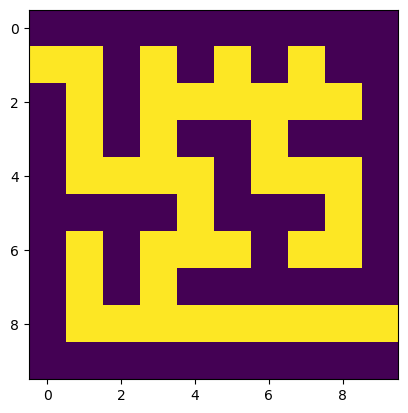

In [34]:
plt.imshow(maze)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0  0  0  0]
 [ 0  5  6  7  8  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0 11 10  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0 13 14 15 16 17 18 19]
 [ 0  0  0  0  0  0  0  0  0  0]]


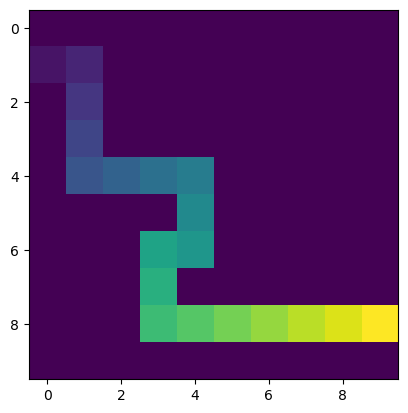

In [35]:
print(mark)
plt.imshow(mark)